<a href="https://colab.research.google.com/github/RachaHachem/genetic-disorder-prediction-XAI/blob/main/Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Genetic Disorder Class & Subclass Predictions**

### **Load the dataset.**

In [1]:
!wget "https://docs.google.com/uc?export=download&id=11XypQz1fEKj82bv29fO_7JjwDNPEv5PE" -O "Genetic_Disorder_Dataset.csv"

--2022-06-07 22:54:22--  https://docs.google.com/uc?export=download&id=11XypQz1fEKj82bv29fO_7JjwDNPEv5PE
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.100, 142.250.141.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dp78rdai0v4gcav3upelmql1v0n8dfpg/1654642425000/06647553919662690540/*/11XypQz1fEKj82bv29fO_7JjwDNPEv5PE?e=download [following]
--2022-06-07 22:54:23--  https://doc-0k-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dp78rdai0v4gcav3upelmql1v0n8dfpg/1654642425000/06647553919662690540/*/11XypQz1fEKj82bv29fO_7JjwDNPEv5PE?e=download
Resolving doc-0k-6k-docs.googleusercontent.com (doc-0k-6k-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0k-6k-docs.googleusercontent.com (doc-0k-6k-docs

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Genetic_Disorder_Dataset.csv')

df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,34.522051,41.96821,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,34.522051,23.00000,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.000000,22.00000,Alive,Normal (30-60),...,Singular,7.485256,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.000000,41.96821,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.000000,41.96821,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


### **Encode categorical data.**

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_data = df[["Genes in mother's side",'Inherited from father','Maternal gene','Paternal gene','Status',
               'Respiratory Rate (breaths/min)','Heart Rate (rates/min','Follow-up','Gender',
               'Folic acid details (peri-conceptional)','H/O serious maternal illness','Assisted conception IVF/ART',
               'History of anomalies in previous pregnancies','Birth defects','Blood test result',
               'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5', 'Disorder Subclass', 'Genetic Disorder']]
num_data = df[['Patient Age','Blood cell count (mcL)',"Mother's age","Father's age",'No. of previous abortion',
               'White Blood cell count (thousand per microliter)']]
cat_data.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Folic acid details (peri-conceptional),...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass,Genetic Disorder
0,Yes,No,Yes,No,Alive,Normal (30-60),Normal,High,Ambiguous,No,...,Yes,Singular,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders
1,Yes,Yes,No,No,Deceased,Tachypnea,Normal,High,Ambiguous,Yes,...,Yes,Multiple,normal,1.0,1.0,1.0,1.0,0.0,Cystic fibrosis,Single-gene inheritance diseases
2,Yes,No,No,No,Alive,Normal (30-60),Tachycardia,Low,Ambiguous,Yes,...,Yes,Singular,normal,0.0,1.0,1.0,1.0,1.0,Diabetes,Multifactorial genetic inheritance disorders
3,Yes,No,Yes,No,Deceased,Tachypnea,Normal,High,Male,No,...,Yes,Singular,inconclusive,0.0,0.0,1.0,0.0,0.0,Leigh syndrome,Mitochondrial genetic inheritance disorders
4,Yes,No,Yes,Yes,Alive,Tachypnea,Tachycardia,Low,Male,No,...,No,Multiple,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Cancer,Multifactorial genetic inheritance disorders


In [5]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Folic acid details (peri-conceptional),...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass,Genetic Disorder
0,1,0,1,0,0,0,0,0,0,0,...,1,1,3,1,1,1,1,1,5,0
1,1,1,0,0,1,1,0,0,0,1,...,1,0,2,1,1,1,1,0,2,2
2,1,0,0,0,0,0,1,1,0,1,...,1,1,2,0,1,1,1,1,3,1
3,1,0,1,0,1,1,0,0,2,0,...,1,1,1,0,0,1,0,0,6,0
4,1,0,1,1,0,1,1,1,2,0,...,0,0,3,0,0,0,0,0,1,1


In [6]:
df_encoded = pd.concat([num_data, cat_data], axis=1)
df_encoded.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass,Genetic Disorder
0,2.0,4.760603,34.522051,41.96821,2.0,9.857562,1,0,1,0,...,1,1,3,1,1,1,1,1,5,0
1,4.0,4.910669,34.522051,23.00000,2.0,5.522560,1,1,0,0,...,1,0,2,1,1,1,1,0,2,2
2,6.0,4.893297,41.000000,22.00000,4.0,7.485256,1,0,0,0,...,1,1,2,0,1,1,1,1,3,1
3,12.0,4.705280,21.000000,41.96821,1.0,7.919321,1,0,1,0,...,1,1,1,0,0,1,0,0,6,0
4,11.0,4.720703,32.000000,41.96821,4.0,4.098210,1,0,1,1,...,0,0,3,0,0,0,0,0,1,1


### **Data balancing.**

In [7]:
df_max = df_encoded.iloc[:,0:-2].max()
df_encoded.iloc[:,0:-2] = df_encoded.iloc[:,0:-2].divide(df_max)

df_encoded.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass,Genetic Disorder
count,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,...,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000
mean,0.495984,0.873268,0.677206,0.655609,0.500305,0.623533,0.596123,0.396397,0.604722,0.432577,...,0.552107,0.546407,0.551462,0.630521,0.593782,0.579229,0.454101,0.419347,5.302565,0.870140
std,0.298688,0.035616,0.166122,0.176205,0.335979,0.210753,0.490686,0.489161,0.488923,0.495446,...,0.497290,0.497854,0.383526,0.482676,0.491139,0.493695,0.497902,0.493465,2.141655,0.937859
min,0.000000,0.729564,0.352941,0.312500,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214286,0.849081,0.568627,0.531250,0.250000,0.469879,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.497648,0.873382,0.676903,0.655753,0.500000,0.623771,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,0.000000
75%,0.714286,0.897295,0.784314,0.781250,0.750000,0.774299,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.000000


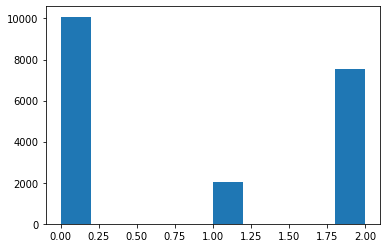

In [8]:
plt.hist(df_encoded['Genetic Disorder'])
plt.show()

(array([10084.,     0.,     0.,     0.,     0., 10084.,     0.,     0.,
            0., 10084.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

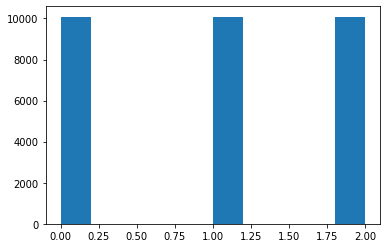

In [9]:
from imblearn.over_sampling import SMOTE

x_new = df_encoded.iloc[:,0:-1]
y_new = df_encoded.iloc[:,-1]
 
over = SMOTE()
x_new, y_new = over.fit_resample(x_new, y_new)
plt.hist([y_new])

In [10]:
df_balanced = pd.concat([x_new, y_new], axis=1)
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30252 entries, 0 to 30251
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       30252 non-null  float64
 1   Blood cell count (mcL)                            30252 non-null  float64
 2   Mother's age                                      30252 non-null  float64
 3   Father's age                                      30252 non-null  float64
 4   No. of previous abortion                          30252 non-null  float64
 5   White Blood cell count (thousand per microliter)  30252 non-null  float64
 6   Genes in mother's side                            30252 non-null  float64
 7   Inherited from father                             30252 non-null  float64
 8   Maternal gene                                     30252 non-null  float64
 9   Paternal gene    

In [11]:
from keras.utils import np_utils

y_new_encoded = le.fit_transform(y_new)
y_new_encoded = np_utils.to_categorical(y_new)
y_new_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### **Hyperparameters tuning.**

In [12]:
import tensorflow
tensorflow.compat.v1.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras import regularizers

def create_model():
  model = Sequential()
  model.add(Dense(100, input_dim = 26, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(48, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(8, activation = 'relu'))
  model.add(Dense(4, activation = 'relu'))
  model.add(Dense(3, activation = "softmax"))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model)

Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [13]:
from sklearn.model_selection import train_test_split

x = x_new.iloc[:,0:-1]
y = y_new_encoded

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [14]:
x.iloc[:100,:].to_pickle("genetic_disorder_data.pkl")

In [15]:
from sklearn.model_selection import GridSearchCV

params={'batch_size':[50, 100], 
        'nb_epoch':[100, 150, 300]
        }

search = GridSearchCV(estimator=model, param_grid=params, cv=3)
search.fit(x.values, y)

print("Best params:", search.best_params_)
print("Best score:", search.best_score_)

Train on 20168 samples
20168/20168 [==============================] - 1s 45us/sample - loss: 0.8409 - acc: 0.6071


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 41us/sample - loss: 1.0067 - acc: 0.5669


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 50us/sample - loss: 0.9569 - acc: 0.4699


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 2s 82us/sample - loss: 0.8656 - acc: 0.5730


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 2s 84us/sample - loss: 0.8597 - acc: 0.6064


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 2s 91us/sample - loss: 0.8790 - acc: 0.5490


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 2s 115us/sample - loss: 0.8516 - acc: 0.5956


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 2s 100us/sample - loss: 0.8669 - acc: 0.5957


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 2s 80us/sample - loss: 0.9481 - acc: 0.4514


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 58us/sample - loss: 0.9843 - acc: 0.5428


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 30us/sample - loss: 0.9162 - acc: 0.5604


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 32us/sample - loss: 0.8887 - acc: 0.5369


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 32us/sample - loss: 1.0323 - acc: 0.5854


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 32us/sample - loss: 0.9231 - acc: 0.5707


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 33us/sample - loss: 0.9371 - acc: 0.5182


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 35us/sample - loss: 0.8555 - acc: 0.6166


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 35us/sample - loss: 0.9462 - acc: 0.5710


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 20168 samples
20168/20168 [==============================] - 1s 35us/sample - loss: 0.9070 - acc: 0.5277


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 30252 samples
30252/30252 [==============================] - 2s 54us/sample - loss: 0.9417 - acc: 0.5346
Best params: {'batch_size': 50, 'nb_epoch': 300}
Best score: 0.584523340066274


### **Test on best params.**

In [16]:
model = Sequential()
model.add(Dense(100, input_dim = 26, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(48, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy', 'Precision', 'Recall'])

epochs = search.best_params_.get('nb_epoch')
batch_size = search.best_params_.get('batch_size')

model.fit(x.values, y, validation_split=0.2, epochs=epochs, 
          batch_size=batch_size, shuffle=True)

Train on 24201 samples, validate on 6051 samples
Epoch 1/300
23750/24201 [============================>.] - ETA: 0s - loss: 0.9113 - acc: 0.5341 - precision: 0.6164 - recall: 0.3806

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


24201/24201 [==============================] - 2s 93us/sample - loss: 0.9083 - acc: 0.5367 - precision: 0.6187 - recall: 0.3853 - val_loss: 0.8866 - val_acc: 0.5664 - val_precision: 0.5967 - val_recall: 0.5105
Epoch 2/300
24201/24201 [==============================] - 1s 61us/sample - loss: 0.8050 - acc: 0.6310 - precision: 0.6638 - recall: 0.5765 - val_loss: 0.7970 - val_acc: 0.6206 - val_precision: 0.6533 - val_recall: 0.5911
Epoch 3/300
24201/24201 [==============================] - 1s 60us/sample - loss: 0.7967 - acc: 0.6360 - precision: 0.6699 - recall: 0.5793 - val_loss: 0.7887 - val_acc: 0.6212 - val_precision: 0.6648 - val_recall: 0.5612
Epoch 4/300
24201/24201 [==============================] - 2s 91us/sample - loss: 0.7787 - acc: 0.6472 - precision: 0.6802 - recall: 0.5868 - val_loss: 0.8329 - val_acc: 0.5949 - val_precision: 0.6314 - val_recall: 0.5328
Epoch 5/300
24201/24201 [==============================] - 3s 118us/sample - loss: 0.7682 - acc: 0.6520 - precision: 0.6864 

In [18]:
model.save("genetic_disorder_model.h5")

### **Evaluate feature importance.**

In [19]:
!pip install lifelines
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 7.5 MB/s 
     |████████████████████████████████| 68 kB 8.4 MB/s 
     |████████████████████████████████| 38.1 MB 14.8 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=a8a22d7ebf8cf8f759cf63a2eb3b427e3b19eb51f1122c1dd5afde2ffa767b32
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 7.5 MB/s 


In [20]:
#feature importance for neural network using SHAP
import matplotlib.pyplot as plt
import sklearn
import lifelines
import shap


features = ['Patient Age','Blood cell count (mcL)',"Mother's age","Father's age",'No. of previous abortion',
               'White Blood cell count (thousand per microliter)', "Genes in mother's side",'Inherited from father','Maternal gene','Paternal gene','Status',
               'Respiratory Rate (breaths/min)','Heart Rate (rates/min','Follow-up','Gender',
               'Folic acid details (peri-conceptional)','H/O serious maternal illness','Assisted conception IVF/ART',
               'History of anomalies in previous pregnancies','Birth defects','Blood test result',
               'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']


e = shap.DeepExplainer(model,  x_train.iloc[:100, :])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


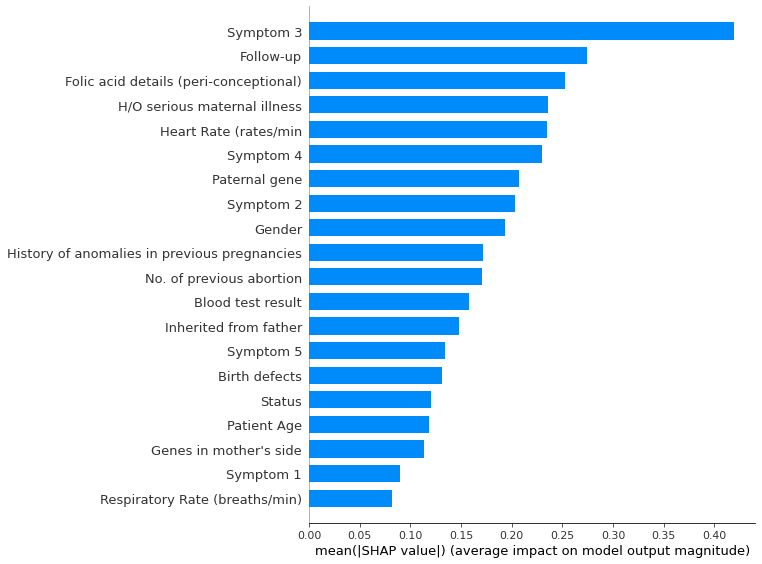

In [21]:
shap_values = e.shap_values(x_test.iloc[:10,:].values)
shap.summary_plot(shap_values[0],x_test,feature_names=features, plot_type="bar",show=False)
plt.savefig('summary.png')

In [22]:
shap.initjs()
# visualize the importance of all the features

r = shap.force_plot(e.expected_value[0], shap_values[0], feature_names=x_train.columns,show=False)
shap.save_html("all_features.html", r)
r

In [23]:
vals = e.shap_values(x_test[:1].values)
shap.initjs()
#visualize the feature importance for the first test sample
features_importance = shap.force_plot(e.expected_value[0], vals[0], x_test.iloc[0,:],show=False)
shap.save_html("features_importance.html", features_importance)
features_importance

### **Predicting the disorder subclass.**

In [24]:
df_balanced = df_balanced[['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age",
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)',
       "Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Follow-up', 'Gender',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5', 'Genetic Disorder', 'Disorder Subclass']]
df_balanced.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,0.142857,0.848618,0.676903,0.655753,0.50,0.821464,1.0,0.0,1.0,0.0,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0,5
1,0.285714,0.875369,0.676903,0.359375,0.50,0.460213,1.0,1.0,0.0,0.0,...,1.0,0.0,0.666667,1.0,1.0,1.0,1.0,0.0,2,2
2,0.428571,0.872272,0.803922,0.343750,1.00,0.623771,1.0,0.0,0.0,0.0,...,1.0,1.0,0.666667,0.0,1.0,1.0,1.0,1.0,1,3
3,0.857143,0.838756,0.411765,0.655753,0.25,0.659943,1.0,0.0,1.0,0.0,...,1.0,1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0,6
4,0.785714,0.841506,0.627451,0.655753,1.00,0.341518,1.0,0.0,1.0,1.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1,1


In [25]:
df_balanced['Genetic Disorder'] = df_balanced['Genetic Disorder'].divide(2)
df_balanced['Genetic Disorder']

0        0.0
1        1.0
2        0.5
3        0.0
4        0.5
        ... 
30247    1.0
30248    1.0
30249    1.0
30250    1.0
30251    1.0
Name: Genetic Disorder, Length: 30252, dtype: float64

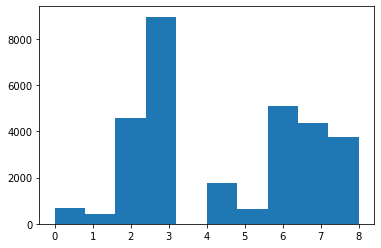

In [26]:
plt.hist(df_balanced['Disorder Subclass'])
plt.show()

In [27]:
y = le.fit_transform(df_balanced.iloc[:,-1])
y = np_utils.to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [28]:
x = df_balanced.iloc[:,0:-1]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [29]:
#for deployment purposes
x.iloc[:100,:].to_pickle("subclass_data.pkl")

In [30]:
model2 = Sequential()
model2.add(Dense(100, input_dim = 27, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(48, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dense(4, activation = 'relu'))
model2.add(Dense(9, activation = "softmax"))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Precision', 'Recall'])

epochs = search.best_params_.get('nb_epoch')
batch_size = search.best_params_.get('batch_size')

model2.fit(x.values, y, validation_split=0.2, epochs=epochs, 
          batch_size=batch_size, shuffle=True)

Train on 24201 samples, validate on 6051 samples
Epoch 1/300
24050/24201 [============================>.] - ETA: 0s - loss: 2.0892 - acc: 0.2414 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


24201/24201 [==============================] - 5s 227us/sample - loss: 2.0887 - acc: 0.2414 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 2.0322 - val_acc: 0.5115 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/300
24201/24201 [==============================] - 4s 163us/sample - loss: 1.9662 - acc: 0.2422 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.9666 - val_acc: 0.5115 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/300
24201/24201 [==============================] - 4s 158us/sample - loss: 1.9198 - acc: 0.2422 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.9355 - val_acc: 0.5115 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/300
24201/24201 [==============================] - 4s 164us/sample - loss: 1.9013 - acc: 0.2422 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.9206 - val_acc: 0.5115 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/300
24201/24201 

In [31]:
model2.save("subclass_model.h5")

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


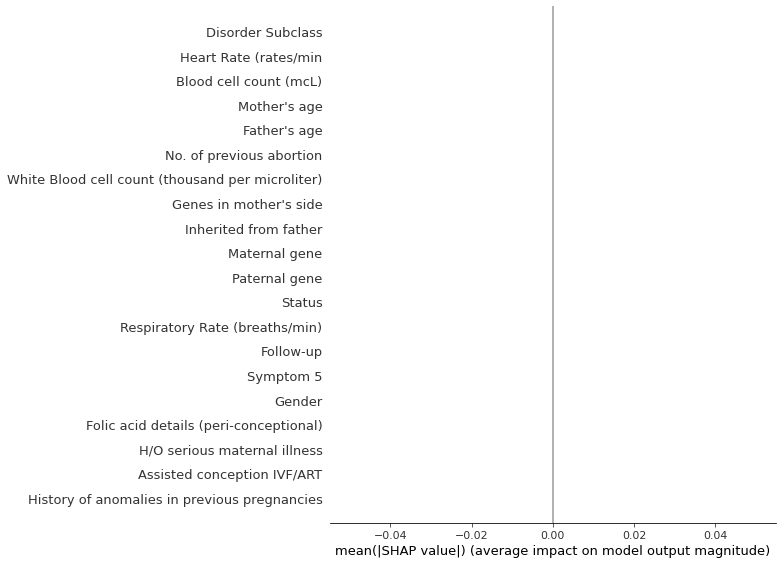

In [32]:
e = shap.DeepExplainer(model2,  x_train.iloc[:50, :])
shap_values = e.shap_values(x_test.iloc[:10,:].values)

#visualize general summary
shap.summary_plot(shap_values[0],x_test,feature_names=df_encoded.columns[:-1], plot_type="bar",show=False)
plt.savefig('summary_subclass.png')

In [33]:
vals = e.shap_values(x_test[:1].values)
shap.initjs()
#visualize the feature importance for the first test sample
features_importance_subclass = shap.force_plot(e.expected_value[0], vals[0], x_test.iloc[0,:],show=False)
shap.save_html("features_importance_subclass.html", features_importance_subclass)
features_importance_subclass

### **Test only on subclass**

In [34]:
df_subclass = df_encoded.drop(columns=['Genetic Disorder'])
df_subclass.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,...,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass
0,0.142857,0.848618,0.676903,0.655753,0.50,0.821464,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,5
1,0.285714,0.875369,0.676903,0.359375,0.50,0.460213,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.666667,1.0,1.0,1.0,1.0,0.0,2
2,0.428571,0.872272,0.803922,0.343750,1.00,0.623771,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.666667,0.0,1.0,1.0,1.0,1.0,3
3,0.857143,0.838756,0.411765,0.655753,0.25,0.659943,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.333333,0.0,0.0,1.0,0.0,0.0,6
4,0.785714,0.841506,0.627451,0.655753,1.00,0.341518,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1


(array([5096., 5096., 5096., 5096.,    0., 5096., 5096., 5096., 5096.,
        5096.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

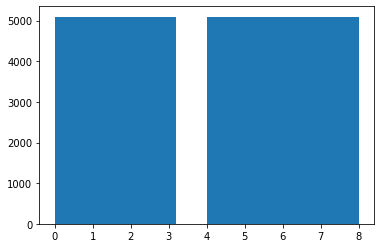

In [35]:
x_subclass = df_subclass.iloc[:,0:-1]
y_subclass = df_subclass.iloc[:,-1]
 
over = SMOTE()
x_subclass, y_subclass = over.fit_resample(x_subclass, y_subclass)
plt.hist([y_subclass])

In [36]:
y_subclass = le.fit_transform(y_subclass)
y_subclass = np_utils.to_categorical(y_subclass)
y_subclass

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_subclass, y_subclass)

In [38]:
model3 = Sequential()
model3.add(Dense(100, input_dim = 26, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(48, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(8, activation = 'relu'))
model3.add(Dense(4, activation = 'relu'))
model3.add(Dense(9, activation = "softmax"))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Precision', 'Recall'])

epochs = search.best_params_.get('nb_epoch')
batch_size = search.best_params_.get('batch_size')

model3.fit(x_subclass.values, y_subclass, validation_split=0.2, epochs=epochs, 
          batch_size=batch_size, shuffle=True)

Train on 36691 samples, validate on 9173 samples
Epoch 1/300
36350/36691 [============================>.] - ETA: 0s - loss: 1.3671 - acc: 0.4618 - precision_4: 0.7977 - recall_4: 0.2196

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


36691/36691 [==============================] - 3s 87us/sample - loss: 1.3649 - acc: 0.4626 - precision_4: 0.7983 - recall_4: 0.2202 - val_loss: 2.2310 - val_acc: 0.1756 - val_precision_4: 0.1430 - val_recall_4: 0.0474
Epoch 2/300
36691/36691 [==============================] - 2s 65us/sample - loss: 1.0694 - acc: 0.5580 - precision_4: 0.7933 - recall_4: 0.3150 - val_loss: 2.0550 - val_acc: 0.1686 - val_precision_4: 0.1761 - val_recall_4: 0.0652
Epoch 3/300
36691/36691 [==============================] - 2s 64us/sample - loss: 1.0167 - acc: 0.5731 - precision_4: 0.7994 - recall_4: 0.3486 - val_loss: 2.1507 - val_acc: 0.1676 - val_precision_4: 0.1398 - val_recall_4: 0.0628
Epoch 4/300
36691/36691 [==============================] - 2s 64us/sample - loss: 0.9804 - acc: 0.5866 - precision_4: 0.8061 - recall_4: 0.3701 - val_loss: 2.1963 - val_acc: 0.1607 - val_precision_4: 0.1454 - val_recall_4: 0.0757
Epoch 5/300
36691/36691 [==============================] - 2s 65us/sample - loss: 0.9624 - a

In [39]:
e = shap.KernelExplainer(model3.predict, x_train.head(50))
shap_values = e.shap_values(x_test.iloc[0,:])

shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0], x_test.iloc[0,:])

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:
